## Soru 1 (12 puan):
* Bir derse kaydolan öğrencilerin listesini içeren ekteki "Ogrenci Listesi.xls" dosyasını ```ogr_list``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Açıklama" sütunundaki ```Nan``` değerlerini ```İlk``` değeri ile, diğer değerleri ise ```Tekrar``` değeri ile değiştirin.
* "Açıklama" sütununun ismini "Tekrar Durumu" olacak şekilde değiştirin.
* Öğrenci numarasının 4. ve 5. karakterleri, öğrencinin okula giriş yılının son 2 basamağını temsil etmektedir. Buna göre DataFrame'e, öğrencilerin okula giriş yılı verilerini ```20##``` formatında içeren "Okula Giriş Yılı" isimli bir sütun ekleyin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [1]:
import pandas as pd
import numpy as np

ogr_list = pd.read_excel('Ogrenci Listesi.xls')
ogr_list = ogr_list.drop(ogr_list.columns[0], axis=1)
ogr_list['Açıklama'] = ogr_list['Açıklama'].fillna('İlk')
ogr_list['Açıklama'] = np.where(ogr_list['Açıklama'] == 'İlk', 'İlk', 'Tekrar')
ogr_list = ogr_list.rename(columns={'Açıklama': 'Tekrar Durumu'})
ogr_list['Okula Giriş Yılı'] = '20' + ogr_list['Öğrenci No'].str[3:5]
ogr_list = ogr_list.set_index('Öğrenci No')
num_rows, num_cols = ogr_list.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

ogr_list

Number of rows: 241
Number of columns: 2


,Tekrar Durumu,Okula Giriş Yılı
Öğrenci No,,
MUH0907596,Tekrar,2009
MUH0910100,Tekrar,2009
MUH0900038,Tekrar,2009
MUH0900056,Tekrar,2009
MUH1000002,Tekrar,2010
...,...,...
MUH1410150,İlk,2014
MUH1410152,İlk,2014
MUH1410153,İlk,2014


## Soru 2 (12 puan):
* Öğrencilerin okula giriş yıllarının dersi tekrar durumlarına göre dağılımını (öğrenci sayılarını), yatay yığılmış (stacked) sütun grafik olarak gösterin.
* Derse tekrar kaydolan öğrencilerin, okula kayıt yıllarına göre dağılımlarını (yüzdelerini) pasta grafik olarak gösterin.

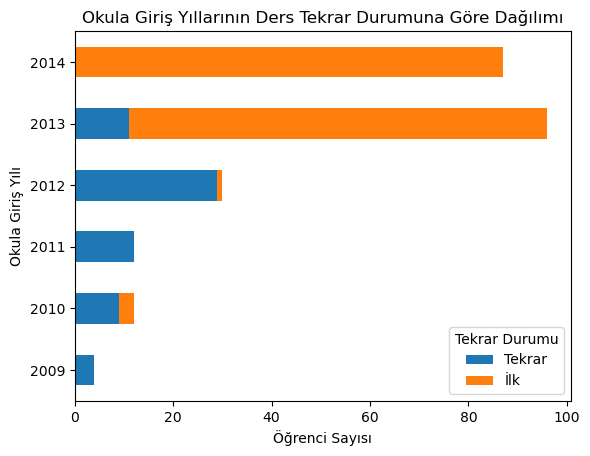

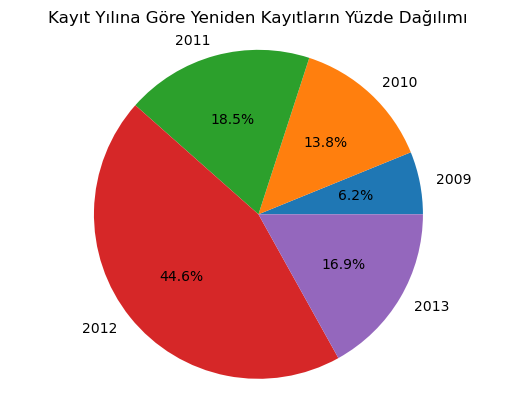

In [2]:
import matplotlib.pyplot as plt

distribution = ogr_list.groupby(['Okula Giriş Yılı', 'Tekrar Durumu']).size().unstack()
distribution.plot(kind='barh', stacked=True)

plt.xlabel('Öğrenci Sayısı')
plt.ylabel('Okula Giriş Yılı')
plt.title('Okula Giriş Yıllarının Ders Tekrar Durumuna Göre Dağılımı')

plt.show()


# Dataframe'i "Okula Giriş Yılı" ve "Tekrar Durumu" olarak gruplayalım
distribution = ogr_list[ogr_list['Tekrar Durumu'] == 'Tekrar'].groupby('Okula Giriş Yılı').size()

# Dağılım yüzdesini hesaplayalım
percentage_distribution = (distribution / distribution.sum()) * 100

# Pasta grafik olarak gösterim
percentage_distribution.plot(kind='pie', autopct='%.1f%%')

plt.axis('equal')
plt.title('Kayıt Yılına Göre Yeniden Kayıtların Yüzde Dağılımı')
plt.ylabel('')

plt.show()



## Soru 3 (20 puan):
* Bu derse ilk kez kaydolan öğrenciler, laboratuvar saatlerine girmek ve orada verilen ödevleri yapmak zorundadır. Derse tekrar kaydolan öğrenciler ise dönem başında laboratuvar saatlerine girmek isteyip istemediklerini bildirmektedirler ve girmek istiyorlarsa yine orada verilen ödevleri yapmak zorundadırlar. Buna göre dersin laboratuvar saatlerine giren öğrencilerin orada verilen ödevlerden aldıkları notları içeren ekteki "Lab Notlari.xls" dosyasını ```lab_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Lab-* Notu" sütunlarındaki eksik veriler, öğrencinin mazereti nedeniyle ilgili ödevden muaf olduğunu göstermektedir. Buna göre DataFrame'e, öğrencilerin mazeretli olmadıkları laboratuvar saatlerinde verilen ödevlerden aldıkları notların ortalamasını (en düşük 2 not dışarıda bırakılacaktır ve en yakın tamsayıya yuvarlatılacaktır) içeren "Lab Notu" isimli bir sütun ekleyin.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.
* Lab saatlerinde verilen ödevlerin (10 adet) sınıf not ortalamalarını gösteren bir sütun grafik oluşturun.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lab_notlari = pd.read_excel('Lab Notlari.xls')
lab_notlari = lab_notlari.drop(columns=lab_notlari.columns[0])
lab_notlari = lab_notlari.set_index('Öğrenci No')

lab_grade_columns = [col for col in lab_notlari.columns if col.startswith('Lab-')]
lab_notlari['Lab Notu'] = lab_notlari[lab_grade_columns].apply(lambda row: np.mean(sorted(row.dropna().values)[2:]), axis=1)
lab_notlari['Lab Notu'] = lab_notlari['Lab Notu'].round().astype(int)
num_rows, num_cols = lab_notlari.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

lab_notlari


Number of rows: 182
Number of columns: 11


,Lab-1 Notu,Lab-2 Notu,Lab-3 Notu,Lab-4 Notu,Lab-5 Notu,Lab-6 Notu,Lab-7 Notu,Lab-8 Notu,Lab-9 Notu,Lab-10 Notu,Lab Notu
Öğrenci No,,,,,,,,,,,
MUH1000065,94.0,93.0,98.0,97.0,65.0,50,58.0,90.0,75.0,25.0,84
MUH1000091,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
MUH1000975,65.0,92.0,100.0,98.0,80.0,64,90.0,91.0,89.0,80.0,90
MUH1000990,70.0,88.0,98.0,75.0,50.0,45,62.0,NaN,1.0,45.0,70
MUH1200826,58.0,82.0,80.0,66.0,50.0,51,66.0,55.0,3.0,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...
MUH1410150,NaN,NaN,NaN,18.0,10.0,22,78.0,67.0,75.0,25.0,53
MUH1410152,NaN,NaN,NaN,0.0,40.0,50,0.0,50.0,75.0,50.0,53
MUH1410153,NaN,NaN,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,0


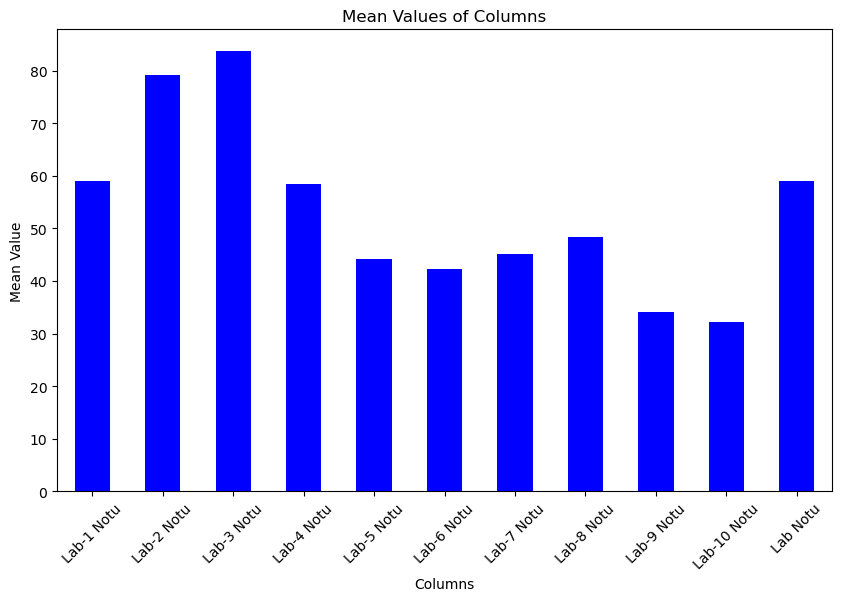

In [4]:
column_means = lab_notlari.mean()
plt.figure(figsize=(10, 6))
column_means.plot(kind='bar', color='blue')
plt.title('Mean Values of Columns')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

## Soru 4 (20 puan):
* Bu derste öğrencilere 2 adet proje verilmektedir. Öğrenciler projeleri isterlerse tek başlarına, isterlerse 2 kişilik grup oluşturarak yapabilmektedir. Grup oluşturulurken öğrencilerin numaraları alt çizgi (_) karakteri ile birleştirilmektedir. Grup üyeleri projeden aynı notu almaktadır. Buna göre projeleri teslim eden öğrencilerin/grupların projelerden aldıkları notları içeren ekteki "1.Proje Notlari.xls" ve "2.Proje Notlari.xls" dosyalarını sırasıyla ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'lere okuyun.
* İkinci proje notu en yüksek ve en düşük olan öğrencilerin/grupların numaralarını yazdırın.
* ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'leri, index'i "Öğrenci No" olan ve projeyi teslim eden her öğrencinin ayrı ayrı notunun yer aldığı DataFrame'ler haline getirin. Bir başka deyişle, ```proje1_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "1. Proje Notu" isimli bir sütun içermelidir. Benzer şekilde, ```proje2_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "2. Proje Notu" isimli bir sütun içermelidir.
* En son oluşan DataFrame'lerin satır sayılarını yazdırın.

In [5]:
import pandas as pd

proje1_notlari = pd.read_excel("1.Proje Notlari.xls")
proje2_notlari = pd.read_excel("2.Proje Notlari.xls")


highest_grade_row = proje2_notlari.loc[proje2_notlari['2. Proje Notu'].idxmax()]
lowest_grade_row = proje2_notlari.loc[proje2_notlari['2. Proje Notu'].idxmin()]

highest_grade_student_number = highest_grade_row['Öğrenci/Grup No ']
lowest_grade_student_number = lowest_grade_row['Öğrenci/Grup No ']

print("İkinci proje notu en yüksek olan Öğrenci/Grup:", highest_grade_student_number)
print("İkinci proje notu en düşük olan Öğrenci/Grup:", lowest_grade_student_number)



İkinci proje notu en yüksek olan Öğrenci/Grup: MUH1300278_MUH1200284
İkinci proje notu en düşük olan Öğrenci/Grup: MUH1400706


In [6]:
import pandas as pd

new_proje1_notlari = proje1_notlari['Öğrenci/Grup No '].str.split('_', expand=True).stack().reset_index(level=1, drop=True).to_frame(name='Öğrenci No')

merged_proje1_notlari = proje1_notlari.drop('Öğrenci/Grup No ', axis=1).merge(new_proje1_notlari, left_index=True, right_index=True)

merged_proje1_notlari

,No,1. Proje Notu,Öğrenci No
0,1,30,MUH0900038
0,1,30,MUH1100009
1,2,49,MUH1000002
2,3,78,MUH1000011
3,4,37,MUH1000029
...,...,...,...
127,128,0,MUH1410135
128,129,54,MUH1410148
128,129,54,MUH1410132
129,130,0,MUH1410152


In [7]:
proje1_notlari = merged_proje1_notlari.set_index('Öğrenci No')
proje1_notlari = proje1_notlari.drop(columns=proje1_notlari.columns[0])
num_rows = proje1_notlari.shape
print("Number of rows:", num_rows)
proje1_notlari

Number of rows: (218, 1)


,1. Proje Notu
Öğrenci No,
MUH0900038,30
MUH1100009,30
MUH1000002,49
MUH1000011,78
MUH1000029,37
...,...
MUH1410135,0
MUH1410148,54
MUH1410132,54


In [8]:
new_proje2_notlari = proje2_notlari['Öğrenci/Grup No '].str.split('_', expand=True).stack().reset_index(level=1, drop=True).to_frame(name='Öğrenci No')

merged_proje2_notlari = proje2_notlari.drop('Öğrenci/Grup No ', axis=1).merge(new_proje2_notlari, left_index=True, right_index=True)

merged_proje2_notlari

,No,2. Proje Notu,Öğrenci No
0,1,40,MUH0910100
1,2,15,MUH1000002
2,3,31,MUH1000029
2,3,31,MUH0900056
3,4,70,MUH1000059
...,...,...,...
99,100,77,MUH1410141
100,101,8,MUH1410145
101,102,41,MUH1410148
101,102,41,MUH1410132


In [9]:
proje2_notlari = merged_proje2_notlari.set_index('Öğrenci No')
proje2_notlari = proje2_notlari.drop(columns=proje2_notlari.columns[0])
num_rows = proje2_notlari.shape
print("Number of rows:", num_rows)
proje2_notlari

Number of rows: (181, 1)


,2. Proje Notu
Öğrenci No,
MUH0910100,40
MUH1000002,15
MUH1000029,31
MUH0900056,31
MUH1000059,70
...,...
MUH1410141,77
MUH1410145,8
MUH1410148,41


## Soru 5 (3 puan):
* Bu dersin ara sınav notlarını içeren ekteki "Arasinav Notlari.xls" dosyasını ```vize_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [10]:
vize_notlari = pd.read_excel("Arasinav Notlari.xls")
vize_notlari = vize_notlari.drop(columns=vize_notlari.columns[0])
vize_notlari = vize_notlari.set_index('Öğrenci No')
vize_notlari

,Arasınav Notu
Öğrenci No,
MUH0907596,27.0
MUH0910100,34.0
MUH0900038,38.0
MUH0900056,80.0
MUH1000002,32.0
...,...
MUH1410150,78.0
MUH1410152,68.0
MUH1410153,NaN


## Soru 6 (5 puan):
* Bu dersin final sınavı notlarını içeren ekteki "Final Sinavi Notlari.xls" dosyasını, son 2 satırı hariç, ```final_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Final Sınavı Notu" sütunundaki öğrencinin sınava girmediğini belirten ```-1``` değerlerini ```NaN``` değeri ile değiştirin.

In [11]:
final_notlari = pd.read_excel("Final Sinavi Notlari.xls")
final_notlari = final_notlari[:-2]
final_notlari = final_notlari.drop(columns = final_notlari.columns[0])
final_notlari = final_notlari.set_index('Öğrenci No')
final_notlari['Final Sınavı Notu'] = final_notlari['Final Sınavı Notu'].replace(-1, np.nan)
final_notlari

,Final Sınavı Notu
Öğrenci No,
MUH0907596,4.0
MUH0910100,41.0
MUH0900038,NaN
MUH0900056,29.0
MUH1000002,NaN
...,...
MUH1410150,40.0
MUH1410152,30.0
MUH1410153,NaN


## Soru 7 (3 puan):
* Bu dersin bütünleme sınavına giren öğrencilerin notlarını içeren ekteki "Butunleme Sinavi Notlari.xls" dosyasını ```butunleme_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [12]:
butunleme_notlari = pd.read_excel("Butunleme Sinavi Notlari.xls")
butunleme_notlari = butunleme_notlari.drop(columns=butunleme_notlari.columns[0])
butunleme_notlari = butunleme_notlari.set_index('Öğrenci No')
butunleme_notlari

,Bütünleme Sınavı Notu
Öğrenci No,
MUH0907596,1
MUH0900056,13
MUH1000029,62
MUH1000990,47
MUH1100024,49
...,...
MUH1410142,77
MUH1410148,57
MUH1410150,76


## Soru 8 (24 puan):
* Derse kayıtlanan tüm öğrencilerin tüm notlarını içermesi için ```ogr_list``` adlı DataFrame'i "Öğrenci No" aracılığıyla diğer tüm DataFrame'ler ile birleştirin, bu sırada ```lab_notlari``` DataFrame'inden sadece "Lab Notu" sütununun alınmasını sağlayın.
* ```ogr_list``` DataFrame'nin "1. Proje Notu", "2. Proje Notu" ve "Arasınav Notu" sütunlarındaki ```Nan``` değerlerini ```0``` değeri ile değiştirin.
* Öğrencilerin bu derse ilişkin proje notu, 1. proje notunun 3/7'si ile 2. proje notunun 4/7'si toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Buna göre DataFrame'e, "Proje Notu" isimli bir sütun ekleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek isteyen, dolayısıyla orada verilen ödevleri de yapan öğrencilerin numara, lab notu ve proje notu verilerini listeleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek istemeyen, dolayısıyla orada verilen ödevleri yapmayan öğrencilerin proje notları, aynı zamanda lab notu yerine de sayılmaktadır. Buna göre "Lab Notu" sütunundaki ```Nan``` değerlerini, ilgili öğrencilerin "Proje Notu" sütunundaki değerleri ile değiştirin.
* Öğrencilerin bu derse ilişkin dönem sonu notu, lab notunun %13'ü, proje notunun %22,75'i, ara sınav notunun %29,25'i ve final/bütünleme sınavı notunun %35'i toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Ancak öğrenci final ve bütünleme sınavlarına girmediyse, dönem sonu notu doğrudan 0 olmaktadır. Ayrıca öğrenci hem final hem bütünleme sınavına girdiyse, final sınavı notu geçerliliğini kaybetmektedir. Buna göre DataFrame'e, "Dönem Sonu Notu" isimli bir sütun ekleyin.

In [13]:
merged_df = ogr_list.merge(lab_notlari[['Lab Notu']], left_on='Öğrenci No', right_index=True, how='left')
merged_df = merged_df.merge(proje1_notlari[['1. Proje Notu']], left_on='Öğrenci No', right_index=True, how='left')
merged_df = merged_df.merge(proje2_notlari[['2. Proje Notu']], left_on='Öğrenci No', right_index=True, how='left')
merged_df = merged_df.merge(vize_notlari[['Arasınav Notu']], left_on='Öğrenci No', right_index=True, how='left')
merged_df = merged_df.merge(final_notlari[['Final Sınavı Notu']], left_on='Öğrenci No', right_index=True, how='left')
merged_df = merged_df.merge(butunleme_notlari[['Bütünleme Sınavı Notu']], left_on='Öğrenci No', right_index=True, how='left')
#herhangi bir hata sonucu karmaşıklık olmasın diye doğrudan ogr_list üzerine geçirmeye korktum hocam
ogr_list_copy = merged_df
ogr_list_copy

,Tekrar Durumu,Okula Giriş Yılı,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu
Öğrenci No,,,,,,,,
MUH0907596,Tekrar,2009,NaN,NaN,NaN,27.0,4.0,1.0
MUH0910100,Tekrar,2009,NaN,95.0,40.0,34.0,41.0,NaN
MUH0900038,Tekrar,2009,NaN,30.0,NaN,38.0,NaN,NaN
MUH0900056,Tekrar,2009,NaN,NaN,31.0,80.0,29.0,13.0
MUH1000002,Tekrar,2010,NaN,49.0,15.0,32.0,NaN,NaN
...,...,...,...,...,...,...,...,...
MUH1410150,İlk,2014,53.0,66.0,27.0,78.0,40.0,76.0
MUH1410152,İlk,2014,53.0,0.0,8.0,68.0,30.0,NaN
MUH1410153,İlk,2014,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
ogr_list_copy['1. Proje Notu'] = ogr_list_copy['1. Proje Notu'].fillna(0)
ogr_list_copy['2. Proje Notu'] = ogr_list_copy['2. Proje Notu'].fillna(0)
ogr_list_copy['Arasınav Notu'] = ogr_list_copy['Arasınav Notu'].fillna(0)
ogr_list_copy

,Tekrar Durumu,Okula Giriş Yılı,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu
Öğrenci No,,,,,,,,
MUH0907596,Tekrar,2009,NaN,0.0,0.0,27.0,4.0,1.0
MUH0910100,Tekrar,2009,NaN,95.0,40.0,34.0,41.0,NaN
MUH0900038,Tekrar,2009,NaN,30.0,0.0,38.0,NaN,NaN
MUH0900056,Tekrar,2009,NaN,0.0,31.0,80.0,29.0,13.0
MUH1000002,Tekrar,2010,NaN,49.0,15.0,32.0,NaN,NaN
...,...,...,...,...,...,...,...,...
MUH1410150,İlk,2014,53.0,66.0,27.0,78.0,40.0,76.0
MUH1410152,İlk,2014,53.0,0.0,8.0,68.0,30.0,NaN
MUH1410153,İlk,2014,0.0,0.0,0.0,0.0,NaN,NaN


In [15]:
ogr_list_copy['Proje Notu'] = ((3/7) * ogr_list_copy['1. Proje Notu'] + (4/7) * ogr_list_copy['2. Proje Notu']).round().astype(int)
ogr_list_copy

,Tekrar Durumu,Okula Giriş Yılı,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu,Proje Notu
Öğrenci No,,,,,,,,,
MUH0907596,Tekrar,2009,NaN,0.0,0.0,27.0,4.0,1.0,0
MUH0910100,Tekrar,2009,NaN,95.0,40.0,34.0,41.0,NaN,64
MUH0900038,Tekrar,2009,NaN,30.0,0.0,38.0,NaN,NaN,13
MUH0900056,Tekrar,2009,NaN,0.0,31.0,80.0,29.0,13.0,18
MUH1000002,Tekrar,2010,NaN,49.0,15.0,32.0,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
MUH1410150,İlk,2014,53.0,66.0,27.0,78.0,40.0,76.0,44
MUH1410152,İlk,2014,53.0,0.0,8.0,68.0,30.0,NaN,5
MUH1410153,İlk,2014,0.0,0.0,0.0,0.0,NaN,NaN,0


In [16]:
selected_students = ogr_list_copy[(ogr_list_copy['Tekrar Durumu'] == 'Tekrar') & (ogr_list_copy['Lab Notu'].notna())]
selected_data = selected_students[['Lab Notu', 'Proje Notu']]
selected_data

,Lab Notu,Proje Notu
Öğrenci No,,
MUH1000065,84.0,54
MUH1200826,64.0,82
MUH1300262,72.0,57
MUH1300278,58.0,94
MUH1300304,66.0,90
MUH1301289,5.0,33


In [17]:
mask = (ogr_list_copy['Tekrar Durumu'] == 'Tekrar') & (ogr_list_copy['Lab Notu'].isna())
ogr_list_copy.loc[mask, 'Lab Notu'] = ogr_list_copy.loc[mask, 'Proje Notu']
ogr_list_copy['Lab Notu'] = ogr_list_copy['Lab Notu'].astype(np.float64)

ogr_list_copy

,Tekrar Durumu,Okula Giriş Yılı,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu,Proje Notu
Öğrenci No,,,,,,,,,
MUH0907596,Tekrar,2009,0.0,0.0,0.0,27.0,4.0,1.0,0
MUH0910100,Tekrar,2009,64.0,95.0,40.0,34.0,41.0,NaN,64
MUH0900038,Tekrar,2009,13.0,30.0,0.0,38.0,NaN,NaN,13
MUH0900056,Tekrar,2009,18.0,0.0,31.0,80.0,29.0,13.0,18
MUH1000002,Tekrar,2010,30.0,49.0,15.0,32.0,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
MUH1410150,İlk,2014,53.0,66.0,27.0,78.0,40.0,76.0,44
MUH1410152,İlk,2014,53.0,0.0,8.0,68.0,30.0,NaN,5
MUH1410153,İlk,2014,0.0,0.0,0.0,0.0,NaN,NaN,0


In [18]:
def calculate_end_of_term_grade(row):
    if np.isnan(row['Final Sınavı Notu']) and np.isnan(row['Bütünleme Sınavı Notu']):
        return 0.0
    elif not np.isnan(row['Bütünleme Sınavı Notu']):
        return round(0.13 * row['Lab Notu'] + 0.2275 * row['Proje Notu'] + 0.2925 * row['Arasınav Notu'] + 0.35 * row['Bütünleme Sınavı Notu'], 2)
    else:
        return round(0.13 * row['Lab Notu'] + 0.2275 * row['Proje Notu'] + 0.2925 * row['Arasınav Notu'] + 0.35 * row['Final Sınavı Notu'], 2)


ogr_list_copy['Dönem Sonu Notu'] = ogr_list_copy.apply(calculate_end_of_term_grade, axis=1)


ogr_list_copy

,Tekrar Durumu,Okula Giriş Yılı,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu,Proje Notu,Dönem Sonu Notu
Öğrenci No,,,,,,,,,,
MUH0907596,Tekrar,2009,0.0,0.0,0.0,27.0,4.0,1.0,0,8.25
MUH0910100,Tekrar,2009,64.0,95.0,40.0,34.0,41.0,NaN,64,47.18
MUH0900038,Tekrar,2009,13.0,30.0,0.0,38.0,NaN,NaN,13,0.00
MUH0900056,Tekrar,2009,18.0,0.0,31.0,80.0,29.0,13.0,18,34.38
MUH1000002,Tekrar,2010,30.0,49.0,15.0,32.0,NaN,NaN,30,0.00
...,...,...,...,...,...,...,...,...,...,...
MUH1410150,İlk,2014,53.0,66.0,27.0,78.0,40.0,76.0,44,66.31
MUH1410152,İlk,2014,53.0,0.0,8.0,68.0,30.0,NaN,5,38.42
MUH1410153,İlk,2014,0.0,0.0,0.0,0.0,NaN,NaN,0,0.00


## Soru 9 (13 puan):
* Dönem sonu notuna göre en başarılı 5 öğrencinin lab, proje, ara sınav ve final sınavı notlarını gösteren bir çizgi grafik oluşturun.
* Dönem sonu notlarının dağılımını bir histogram grafiği ile gösterin.
* 15 ve üzerindeki dönem sonu notlarını dikkate alarak sınıfın ortalamasını, standart sapmasını ve medyanını bulun.

<Figure size 1000x600 with 0 Axes>

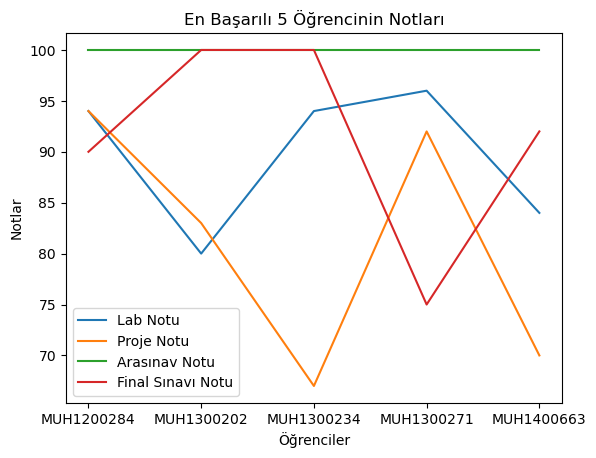

In [19]:
import matplotlib.pyplot as plt

sorted_grades = ogr_list_copy.sort_values(by='Dönem Sonu Notu', ascending=False)

top_5_students = sorted_grades.head(5)

grades = top_5_students[['Lab Notu', 'Proje Notu', 'Arasınav Notu', 'Final Sınavı Notu']]

plt.figure(figsize=(10, 6))
grades.plot(kind='line')
plt.title('En Başarılı 5 Öğrencinin Notları')
plt.xlabel('Öğrenciler')
plt.ylabel('Notlar')
plt.legend(loc='lower left')
plt.xticks(range(5), top_5_students.index)
plt.show()

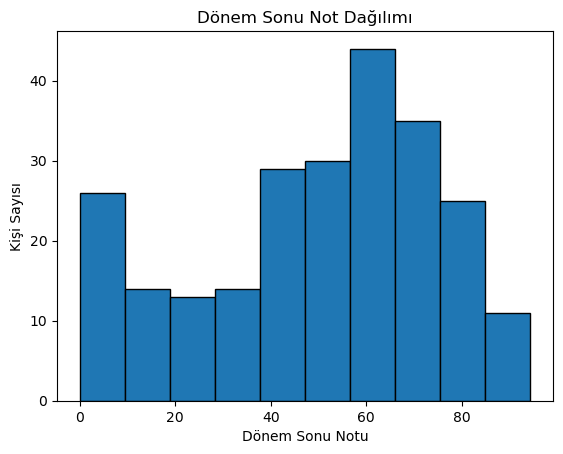

In [20]:
plt.hist(ogr_list_copy['Dönem Sonu Notu'], bins=10, edgecolor='black')

plt.xlabel('Dönem Sonu Notu')
plt.ylabel('Kişi Sayısı')
plt.title('Dönem Sonu Not Dağılımı')

plt.show()


In [21]:
filtered_grades = ogr_list_copy[ogr_list_copy['Dönem Sonu Notu'] >= 15]
end_of_term_grades = filtered_grades['Dönem Sonu Notu']

mean_grade = end_of_term_grades.mean()
std_deviation = end_of_term_grades.std()
median_grade = end_of_term_grades.median()

print("Ortalama Not: ", mean_grade)
print("Standart Sapma: ", std_deviation)
print("Medyan: ", median_grade)


Ortalama Not:  57.13365853658538
Standart Sapma:  18.1391736408533
Medyan:  58.27


## Soru 10 (8 puan):
* Ara sınav notu ile 1. proje notu arasındaki ve final sınavı notu ile 2. proje notu arasındaki ilişkileri, aynı figürde yan yana iki saçılım grafiği (subplot) olarak gösterin. Grafiklere uygun birer başlık (```title```) atayın.

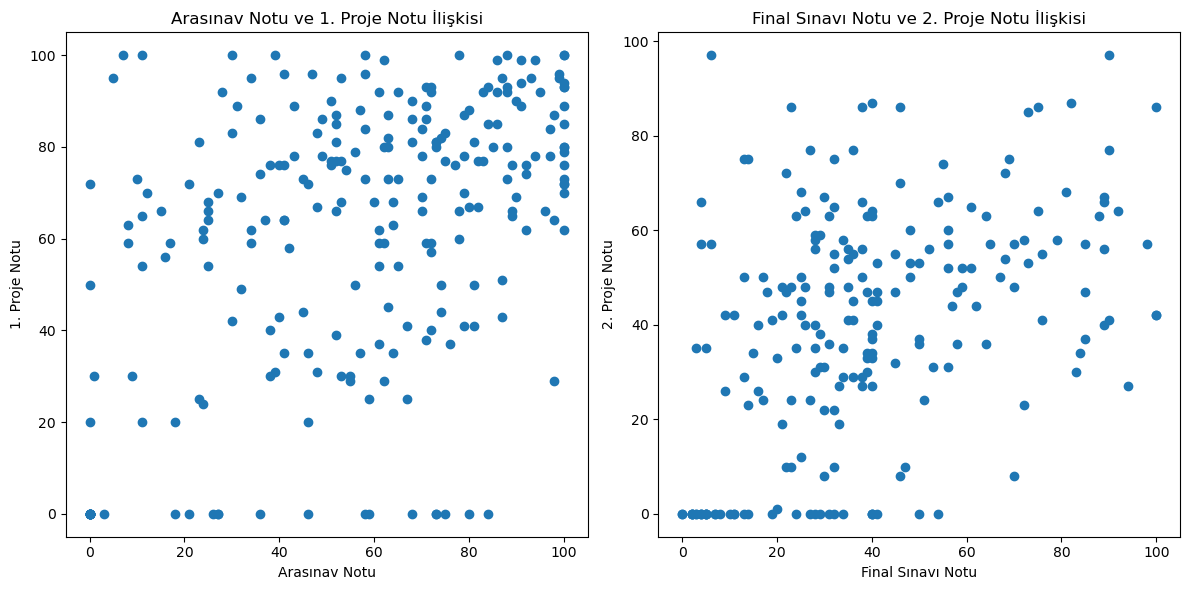

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(ogr_list_copy['Arasınav Notu'], ogr_list_copy['1. Proje Notu'])
axes[0].set_xlabel('Arasınav Notu')
axes[0].set_ylabel('1. Proje Notu')
axes[0].set_title('Arasınav Notu ve 1. Proje Notu İlişkisi')

axes[1].scatter(ogr_list_copy['Final Sınavı Notu'], ogr_list_copy['2. Proje Notu'])
axes[1].set_xlabel('Final Sınavı Notu')
axes[1].set_ylabel('2. Proje Notu')
axes[1].set_title('Final Sınavı Notu ve 2. Proje Notu İlişkisi')

plt.tight_layout()
plt.show()
